<a href="https://colab.research.google.com/github/dipaknew/data_with_dipak/blob/main/walmart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd 
import datetime                                                                      
import calendar                                        
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import sklearn                
import scipy as sp
import time                                           
import warnings
warnings.filterwarnings('ignore')                    
%matplotlib inline

#Data information

The dataset consists of three files in the csv format.

1.train.csv

2.store.csv

3.features.csv

##Information about csv files

1.train.csv :- this file has 421570 rows and 5 columns. The columns contain the information about store,dept,date,weekly_sales and isholiday(wheather a particular week is a holiday or not)

2.store.csv :- This file has 45 rows and 3 columns.The columns contain the information about stores,their type and size of stores.

3.features.csv :- This file 8190 rows and 12 columns. The columns contain the information about store,date,temperature,fuel_price,CPI(consumer price index),Isholiday,unemployment rate for the region in which a particular store is located.It also has 5 columns MarkDown 1-5 which corresponds to some promotional activities going on in different stores.

CPI(consumer price index) :- The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time. The CPI is the most widely used measure of inflation, closely followed by policymakers, financial markets, businesses, and consumers.

- Target column is weekly_sales

In [ ]:
#loading in data
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")
walmart_df = pd.read_csv("train.csv")

In [ ]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
walmart_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


#Merging of Data

Lets merge the data from 3 dataframes into a single dataframe and proceed further with a one dataframe

In [ ]:
#creating the final dataset
final_df = walmart_df.merge(stores_df,on='Store',how='left')
final_df = final_df.merge(features_df,on=['Store','Date'],how='left')

#Left join, also known as Left Outer Join, returns a dataframe containing all the rows of the left dataframe.

In [ ]:
final_df.shape

(421570, 17)

In [ ]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


#Pre-Processing

###Remove Extra IsHoliday column from final_df

In [ ]:
final_df['IsHoliday'] = final_df['IsHoliday_x']

In [ ]:
final_df = final_df.drop(columns=['IsHoliday_x','IsHoliday_y'])
final_df.shape

(421570, 16)

In [ ]:
final_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')

###Extracting Date Information

The sales are given for years 2010-2012 on weekly basis. So let's split the date column to extract information for year,month and week

In [ ]:
final_df['Date'] = pd.to_datetime(final_df['Date'],format='%Y-%m-%d')
final_df['Week_Number'] = final_df['Date'].dt.week
final_df['Month'] = final_df['Date'].dt.month
final_df['Year'] = final_df['Date'].dt.year

In [ ]:
final_df.shape

(421570, 19)

###Checking missing values


In [ ]:
final_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Week_Number          0
Month                0
Year                 0
dtype: int64

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     150681 non-null  float64       
 9   MarkDown2     111248 non-null  float64       
 10  MarkDown3     137091 non-null  float64       
 11  MarkDown4     134967 non-null  float64       
 12  MarkDown5     151432 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  IsHoliday     421

Except the markdown 1-5 columns, all other columns are complete. Markdown 1-5 colums have lots of missing values,more than 270000 in each column.The markdown columns related to the promotional activities. Markdown data is only available after November 2011, and is not available for all stores all the time. Any missing value is marked with Null(Kaggle Instruction).

###Filling NULL value

In [ ]:
final_df['MarkDown1']=final_df['MarkDown1'].fillna(0)
final_df['MarkDown2']=final_df['MarkDown2'].fillna(0)
final_df['MarkDown3']=final_df['MarkDown3'].fillna(0)
final_df['MarkDown4']=final_df['MarkDown4'].fillna(0)
final_df['MarkDown5']=final_df['MarkDown5'].fillna(0)

In [ ]:
#checking null value
final_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Week_Number     0
Month           0
Year            0
dtype: int64

In [ ]:
final_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Week_Number              int64
Month                    int64
Year                     int64
dtype: object

#Exploratory Data Analysis-->
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

##One Hot Encoding

OHE is used to convert columns into numbers directly.

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'master_df'.
final_df['Type']= label_encoder.fit_transform(final_df['Type'])
final_df['IsHoliday']= label_encoder.fit_transform(final_df['IsHoliday'])
final_df['Month']= label_encoder.fit_transform(final_df['Month'])

In [ ]:
final_df.to_csv('final.csv',index=False)

In [ ]:
final_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Week_Number', 'Month',
       'Year'],
      dtype='object')

In [ ]:
final_df.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Month,Year
0,1,1,2010-02-05,24924.50,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5,1,2010
1,1,1,2010-02-12,46039.49,0,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,6,1,2010
2,1,1,2010-02-19,41595.55,0,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,7,1,2010
3,1,1,2010-02-26,19403.54,0,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,8,1,2010
4,1,1,2010-03-05,21827.90,0,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,9,2,2010


In [ ]:
final_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
Type                     int64
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                int64
Week_Number              int64
Month                    int64
Year                     int64
dtype: object

###Correlation Matrix
-Correlation matrix is used to see relationship variables.

-Darks shades represents positive correlation while lighter shades represents negative correlation.

-If you set annot=True, you'll get values by which features are correlated to each other in grid-cells.

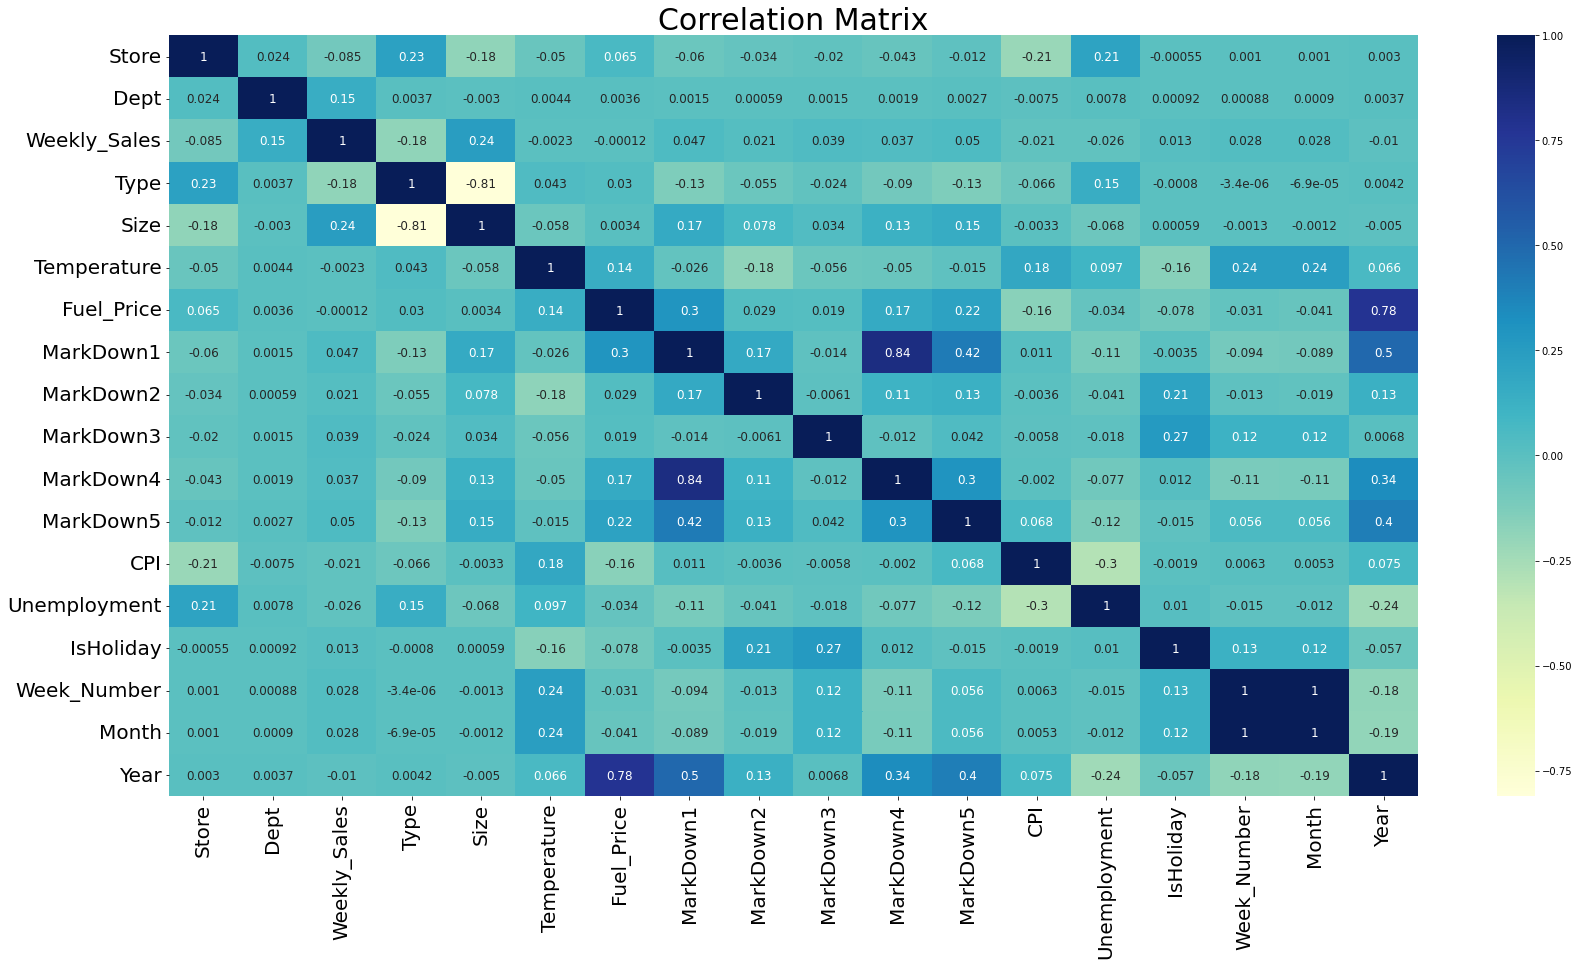

In [ ]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(final_df.corr(),cmap='YlGnBu',annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

###Analysing Correlation matrix
- Department,store size and type have moderate correlation with the weekly sales.
- Markdown 1-5 have very weak correlation with the weekly sales,so these columns will out.
- temperature ,fuel price ,CPI and unemployment have negative correlation with the weekly sales, so those columns also out.
- IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks.
- Month and date will out because this information is already contained in the week_number and year.

###Creating final dataset for perform model

In [ ]:
x = final_df_new_var.drop(['Date', 'Weekly_Sales', 'IsHoliday','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Year', 'Week_Number',  'Month',
                   ,'Unemployment','CPI','Fuel_Price','Temperature','Size'],axis=1)
y = final_df_new_var['Weekly_Sales']

#Train Test Split

X_train,Y_train --> training
X_test --> for prediction

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, train_size=0.2, random_state= 9876)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((84314, 3), (337256, 3), (84314,), (337256,))

In [ ]:
X_train.head()

,Store,Dept,Type
9819,1,96,0
317469,33,42,0
387774,41,58,0
148061,16,1,1
211947,22,36,1


#Machine Learning
Following ML models will be tested in this study:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree
- Random Forest
- Gradient Boosting Machine 

##Create evaluation funtion

This function will calculate mean_squared_erroe(MSE),mean_absolute_error(MAE),RMSE and R2 score.

In [ ]:
def eval_fun(Y_test,Y_pred):
  from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
  r2 = r2_score(Y_test,Y_pred)
  mse = mean_squared_error(Y_test,Y_pred)
  mae = mean_absolute_error(Y_test,Y_pred)
  rmse = np.sqrt(mse)
  return r2, mse, mae, rmse

###Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
#create a model
reg = LinearRegression()
#train model
reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#predict the values from X_test
Y_pred = reg.predict(X_test)

In [ ]:
#Calculating r2,mse,mae,rmse
r2, mse, mae, rmse = eval_fun(Y_test,Y_pred)
print("r2 score =",r2,"mse = ",mse," mae = ",mae, " rmse = ",rmse)

r2 score = 0.057946992391477936 mse =  485494417.9822531  mae =  14851.892488965374  rmse =  22033.93786825798


###Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
#create a model
rng = Ridge()
# train model
rng.fit(X_train,Y_train)

Ridge()

In [ ]:
#predict the values from X_test
Y_pred = rng.predict(X_test)
#Calculating r2,mse,mae,rmse
r2, mse, mae, rmse = eval_fun(Y_test,Y_pred)
print("r2 score =",r2,"mse = ",mse," mae = ",mae, " rmse = ",rmse)

r2 score = 0.05794694954041257 mse =  485494440.06588626  mae =  14851.894537565542  rmse =  22033.938369385676


###Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
#create a model
Lasso_model = Lasso()
# train model
Lasso_model.fit(X_train,Y_train)

Lasso()

In [ ]:
#predict the values from X_test
Y_pred = Lasso_model.predict(X_test)
#Calculating r2,mse,mae,rmse
r2, mse, mae, rmse = eval_fun(Y_test,Y_pred)
print("r2 score =",r2,"mse = ",mse," mae = ",mae, " rmse = ",rmse)

r2 score = 0.05794637643083966 mse =  485494735.42240685  mae =  14851.919761520474  rmse =  22033.945071693513


###Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#create a model
regressor = DecisionTreeRegressor()
#train model
regressor.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
#predict the values from X_test
Y_pred = regressor.predict(X_test)
# Calculating r2,mse,mae,rmse
r2, mse, mae, rmse = eval_fun(Y_test,Y_pred)
print("r2 score =",r2," mse =",mse," mae =",mae," rmse =",rmse)

r2 score = 0.9008880714403626  mse = 51078110.97945748  mae = 2720.614722468857  rmse = 7146.895198578015


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#create a model
#n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions
regr = RandomForestRegressor(n_estimators=50)
#train model
regr.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
#predict the values from X_test
Y_pred = regr.predict(X_test)
# Calculating r2,mse,mae,rmse
r2, mse, mae, rmse = eval_fun(Y_test,Y_pred)
print("r2 score =",r2," mse =",mse," mae =",mae," rmse =",rmse)

r2 score = 0.9010152141500906  mse = 51012586.9852008  mae = 2723.6669480713613  rmse = 7142.3096394094255


###XG Boosting Machine

In [ ]:
from xgboost import XGBRegressor

#create a model
XGBoost_model=XGBRegressor()

# train the model
XGBoost_model.fit(X_train,Y_train)

[08:47:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#predict the values from X_test
Y_pred = XGBoost_model.predict(X_test)
# Calculating r2,mse,mae,rmse
r2, mse, mae, rmse = eval_fun(Y_test,Y_pred)
print("r2 score =",r2," mse =",mse," mae =",mae," rmse =",rmse)

r2 score = 0.7087282849619312  mse = 150109166.49593067  mae = 7226.088043485519  rmse = 12251.904606873606


###Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
 #create a model
Gradient_reg = GradientBoostingRegressor()

#train the model
Gradient_reg.fit(X_train,Y_train)

GradientBoostingRegressor()

In [ ]:
#predict the values from X_test
Y_pred = Gradient_reg.predict(X_test)
# Calculating r2,mse,mae,rmse
r2, mse, mae, rmse = eval_fun(Y_test,Y_pred)
print("r2 score =",r2," mse =",mse," mae =",mae," rmse =",rmse)

r2 score = 0.7088192539364833  mse = 150062284.92026785  mae = 7224.883389420686  rmse = 12249.991221232276


##Inferences and Conclusions

Following inferences and conclusions can be drawn from the the analysis of the data:

* Type 'A' stores are more popular than 'B' and 'C' types

* Type 'A' stores outclass the 'B' and 'C' types in terms of size and the avergae weekly sales

* Weekly Sales are effected by the week of year. Holiday weeks witnessed more sales than the non-holiday weeks. Notables are Thanksgiving and Christmas weeks

* Size of the store is a major contributing factor in the weekly sales

* Sales are also dependent on the department of the store as different departments showed different levels of weekly sales

* Among the trained models for predicting the future sales, *XG Boosting Machine* performs the best


#Model Exporting

##Using pickle

####XGBoost Model

In [ ]:
import pickle
pickle.dump(XGBoost_model,open('model.pkl','wb'))

####Random Forest

In [ ]:
pickle.dump(regr,open('model_1.pkl','wb'))

##using joblib

In [ ]:
import joblib
joblib.dump(XGBoost_model, 'test_walmart.pkl')

['test_walmart.pkl']

In [ ]:
def one_or_two():
    inp = input("Choose 1 or 2")
    if inp == "1":
        print("You chose one")
        # whatevercodeyouwant_1()
    elif inp == "2":
        print("You chose two")
        # whatevercodeyouwant_2()
    else:
        print("You must choose between 1 or 2")
        return one_or_two()
one_or_two()

Choose 1 or 21
You chose one
